# HCP Retinotopy Data Loader

The HCP 7T retinotopyy dataset comprises fMRI retinotopy from 183 human subjects. The NMA-curated dataset includes the average data over all those subjects. 

In order to use this dataset, please electronically sign the HCP data use terms at [ConnectomeDB](https://db.humanconnectome.org). Instructions for this are on pp. 24-25 of the [HCP Reference Manual](https://www.humanconnectome.org/storage/app/media/documentation/s1200/HCP_S1200_Release_Reference_Manual.pdf).

The data and experiment are decribed in detail in [Benson et al.](https://jov.arvojournals.org/article.aspx?articleid=2719988#207329261)

In [1]:
# @title Install dependencies
!pip install nilearn --quiet

     |████████████████████████████████| 9.6 MB 4.5 MB/s 


In [2]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from nilearn import plotting

In [3]:
# @title Figure settings
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/nma.mplstyle")

# Basic parameters

In [4]:
# The download cells will store the data in nested directories starting here:
DATA_DIR = "./hcp_retino"
if not os.path.isdir(DATA_DIR):
  os.mkdir(DATA_DIR)

# The data acquisition rate
TR = 1  # Time resolution, in sec

# Time series data are organized by experiment, with each experiment
# having an LR and RL (phase-encode direction) acquistion
RUN_NAMES = [
  "BAR1",   # Sweeping Bars repeat 1
  "BAR2",   # Sweeping Bars repeat 2
  "CCW",    # Counter Clockwise rotating wedge
  "CW",     # Clockwise rotating wedge
  "EXP",    # Expanding ring
  "CON"     # Contracting ring
]

In [ ]:
#Omar Added This.............

In [ ]:
# Samar was here

In [ ]:
# Mabrouka added this ...

# Downloading data

The files that we provide are:

 - The whole brain time series data in [CIFTI](https://nipy.org/nibabel/reference/nibabel.cifti2.html#module-nibabel.cifti2.cifti2) format
 - The stimulus image files as numpy arrays (time x height x width x 3)
 - surface files for visualisation on the brain 

In [5]:
# @title Download the data

import os, requests, tarfile

fname = "hcp_retino.tgz"
url = "https://osf.io/d25b4/download"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      print(f"Downloading {fname}...")
      with open(fname, "wb") as fid:
        fid.write(r.content)
      print(f"Download {fname} completed!")

Download hcp_retino.tgz completed!


In [6]:
# @title Extract the data in `DATA_DIR`
fname_ex = "HCP7T_retino"
path_name = os.path.join(DATA_DIR, fname_ex)
if not os.path.exists(path_name):
  print(f"Extracting {fname}...")
  with tarfile.open(f"{fname}") as fzip:
    fzip.extractall(DATA_DIR)
else:
  print(f"File {fname}.tgz has already been extracted.")

Extracting hcp_retino.tgz...


# Load an example run

Pick one of the runs explained above and load the timeseries data

In [7]:
# pick a run
run = 'CON'
# define filename
filename = os.path.join(DATA_DIR, fname_ex, f'tfMRI_RET{run}_7T_PA.dtseries.nii')
# load the file with nibabel
cifti_con = nib.load(filename) # i changed the name " CON "
CON_data = cifti_con.get_fdata()
print(CON_data.shape)

(300, 91282)


In [8]:
# EXP Mask
cifti_EXP = nib.load("/content/hcp_retino/HCP7T_retino/tfMRI_RETEXP_7T_AP.dtseries.nii")
EXP_data=cifti_EXP.get_fdata()
#print(cifti_EXP.get_fdata().shape)
print(EXP_data.shape)

(300, 91282)


In [9]:
# "CW" Mask
cifti_CW = nib.load("/content/hcp_retino/HCP7T_retino/tfMRI_RETCW_7T_PA.dtseries.nii")
CW_data=cifti_CW.get_fdata()

print(CW_data.shape)

(300, 91282)


In [10]:
# "CCW" Mask
cifti_CCW = nib.load("/content/hcp_retino/HCP7T_retino/tfMRI_RETCCW_7T_AP.dtseries.nii")
CCW_data=cifti_CCW.get_fdata()

print(CCW_data.shape)

(300, 91282)


In [11]:
# "BAR1" Mask
cifti_BAR1 = nib.load("/content/hcp_retino/HCP7T_retino/tfMRI_RETBAR1_7T_AP.dtseries.nii")
BAR1_data=cifti_BAR1.get_fdata()

print(BAR1_data.shape)

(300, 91282)


In [12]:
# "BAR2" Mask
cifti_BAR2 = nib.load("/content/hcp_retino/HCP7T_retino/tfMRI_RETBAR2_7T_PA.dtseries.nii")
BAR2_data=cifti_BAR2.get_fdata()

print(BAR2_data.shape)

(300, 91282)


# **T-statistics**
- using the t-statistics to test whether voxels are selective to stimulus
- doing that to voxels' responses to a pair of stimuli
- calculate the t-statistic value for each test inside a loop

In [13]:
# LIST of runs ["CON", "EXP","CW","CWW","BAR1","BAR2"]
runs=  ["CON", "EXP","CW","CCW","BAR1","BAR2"]
# mean_runs: list of the means for the responses to each stimulus
mean_runs= {"CON": np.mean(CON_data),"EXP": np.mean(EXP_data),"CW":np.mean(CW_data),"CCW":np.mean(CCW_data),"BAR1":np.mean(BAR1_data),"BAR2": np.mean(BAR2_data)}
std_runs = {"CON":np.std(CON_data),"EXP":np.std(EXP_data),"CW":np.std(CW_data),"CCW":np.std(CCW_data),"BAR1":np.std(BAR1_data),"BAR2":np.std(BAR2_data)}

print('mean for the runs  ',mean_runs)
print('std for the runs  ', std_runs)

mean for the runs   {'CON': 10886.770289604807, 'EXP': 10950.30610792617, 'CW': 10899.750523761993, 'CCW': 10955.16422206207, 'BAR1': 10944.330042978649, 'BAR2': 10889.998815392708}
std for the runs   {'CON': 1822.3393862699877, 'EXP': 1692.2712421717833, 'CW': 1824.483764199091, 'CCW': 1691.3443210533349, 'BAR1': 1690.3102568387133, 'BAR2': 1816.9319634898543}


In [ ]:
conMean=np.mean(CON_data,axis=0)
conMean.shape

(91282,)

In [ ]:
x=np.array([[1,2,3,4,5,6,7],[10,20,30,40,50,60,70]])
x.shape

(2, 7)

In [ ]:
np.mean(x,axis=0).shape

(7,)

In [14]:
import scipy

In [ ]:
# t_matrix

In [15]:
for run in runs:
  for i in runs:
    if i != run:
      s,p=scipy.stats.ttest_ind_from_stats(mean_runs[i], std_runs[i], 91282, mean_runs[run], std_runs[run], 91282, equal_var=True, alternative='two-sided')
      print(f't-test results for {run} and {i} ',scipy.stats.ttest_ind_from_stats(mean_runs[i], std_runs[i], 91282, mean_runs[run], std_runs[run], 91282, equal_var=True, alternative='two-sided'))

t-test results for CON and EXP  Ttest_indResult(statistic=7.71883547347982, pvalue=1.1798837484722354e-14)
t-test results for CON and CW  Ttest_indResult(statistic=1.5208112627315342, pvalue=0.128308939120788)
t-test results for CON and CCW  Ttest_indResult(statistic=8.311145349222068, pvalue=9.542184590179445e-17)
t-test results for CON and BAR1  Ttest_indResult(statistic=6.996568645969389, pvalue=2.632042694899137e-12)
t-test results for CON and BAR2  Ttest_indResult(statistic=0.37905035972196094, pvalue=0.7046509084280165)
t-test results for EXP and CON  Ttest_indResult(statistic=-7.71883547347982, pvalue=1.1798837484722354e-14)
t-test results for EXP and CW  Ttest_indResult(statistic=-6.138014267751694, pvalue=8.373045779181367e-10)
t-test results for EXP and CCW  Ttest_indResult(statistic=0.6134713071163623, pvalue=0.5395655136032316)
t-test results for EXP and BAR1  Ttest_indResult(statistic=-0.7548741226882175, pvalue=0.45032548761745417)
t-test results for EXP and BAR2  Ttest_i

In [ ]:
# pvalue_matrix = np.array([])
pvalue_matrix = np.zeros((6,6))
for idx_run1,run1 in enumerate(runs):
  for idx_run2,run2 in enumerate(runs):
    s,p=scipy.stats.ttest_ind_from_stats(mean_runs[run2], std_runs[run2], 91282, mean_runs[run1], std_runs[run1], 91282, equal_var=True, alternative='two-sided')
    print(f"inx1={idx_run1},indx2={idx_run2}")
    pvalue_matrix[idx_run1][idx_run2]=p
    print(f't-test results for {run1} and {run2} statistic ={s} pvalue ={p} ')

inx1=0,indx2=0
t-test results for CON and CON statistic =0.0 pvalue =1.0 
inx1=0,indx2=1
t-test results for CON and EXP statistic =7.71883547347982 pvalue =1.1798837484722354e-14 
inx1=0,indx2=2
t-test results for CON and CW statistic =1.5208112627315342 pvalue =0.128308939120788 
inx1=0,indx2=3
t-test results for CON and CCW statistic =8.311145349222068 pvalue =9.542184590179445e-17 
inx1=0,indx2=4
t-test results for CON and BAR1 statistic =6.996568645969389 pvalue =2.632042694899137e-12 
inx1=0,indx2=5
t-test results for CON and BAR2 statistic =0.37905035972196094 pvalue =0.7046509084280165 
inx1=1,indx2=0
t-test results for EXP and CON statistic =-7.71883547347982 pvalue =1.1798837484722354e-14 
inx1=1,indx2=1
t-test results for EXP and EXP statistic =0.0 pvalue =1.0 
inx1=1,indx2=2
t-test results for EXP and CW statistic =-6.138014267751694 pvalue =8.373045779181367e-10 
inx1=1,indx2=3
t-test results for EXP and CCW statistic =0.6134713071163623 pvalue =0.5395655136032316 
inx1=1,i

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
# plt.imshow(pvalue_matrix, cmap='hot', interpolation='nearest')
sns.heatmap(pvalue_matrix, linewidth=0.5,xticklabels=runs, yticklabels=runs)
# sns.heatmap(pvalue_matrix, annot=True, fmt="f",xticklabels=runs, yticklabels=runs)
plt.show()
runs=  ["CON", "EXP","CW","CCW","BAR1","BAR2"]

NameError: ignored

In [17]:
for idx_run1,run1 in enumerate(runs):
  for i in runs[idx_run1:]:
    if i != run1:
      print(f't-test results for {run1} and {i} ',scipy.stats.ttest_ind_from_stats(mean_runs[i], std_runs[i], 91282, mean_runs[run1], std_runs[run1], 91282, equal_var=True, alternative='two-sided'))


t-test results for CON and EXP  Ttest_indResult(statistic=7.71883547347982, pvalue=1.1798837484722354e-14)
t-test results for CON and CW  Ttest_indResult(statistic=1.5208112627315342, pvalue=0.128308939120788)
t-test results for CON and CCW  Ttest_indResult(statistic=8.311145349222068, pvalue=9.542184590179445e-17)
t-test results for CON and BAR1  Ttest_indResult(statistic=6.996568645969389, pvalue=2.632042694899137e-12)
t-test results for CON and BAR2  Ttest_indResult(statistic=0.37905035972196094, pvalue=0.7046509084280165)
t-test results for EXP and CW  Ttest_indResult(statistic=-6.138014267751694, pvalue=8.373045779181367e-10)
t-test results for EXP and CCW  Ttest_indResult(statistic=0.6134713071163623, pvalue=0.5395655136032316)
t-test results for EXP and BAR1  Ttest_indResult(statistic=-0.7548741226882175, pvalue=0.45032548761745417)
t-test results for EXP and BAR2  Ttest_indResult(statistic=-7.338292679512756, pvalue=2.1722808710115771e-13)
t-test results for CW and CCW  Ttest_i

Based on the t-test using descriptive statistics in which we used the mean and the standard deviation of the voxels'responses to each stimulus and the number of samples (I assumed is ) the number of voxels : statistically there is no significant difference between the voxels responses

*   to stimuli {"CCW" and "BAR1"}, {"CON" and "BAR2"}, {"CW" and "BAR2"}, {EXP and BAR1}, {CON and CW}, {CCW and EXP},

**BUT** this may be contradictory to the results of t-test when it's conducted to each pair of voxels! ***SEE BELOW***

# **t-test for each pair of voxels reponses**


*   conduct the t-test for the voxels responses for the 15 pairs of stimuli
*   extract for each pair of stimuli the voxels' indexes where p-values< 5%, so the voxels resposes are diffrent
*   step 3: localize the voxels in the brain



In [ ]:
# List of Pairs :  ["CONEXP", "CONCW","CONCCW","CONBAR1","CONBAR2", "EXPCW","EXPCCW","EXPBAR1","EXPBAR2","CWCCW","CWBAR1","CWBAR2","CCWBAR1","CCWBAR2","BAR1BAR2"]

In [18]:
import scipy
# Run the t-test for muCON_i=muEXP_i Voxels level
CONEXP= scipy.stats.ttest_ind(CON_data, EXP_data, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=11, alternative='two-sided', trim=0)
print(CONEXP)
CONEXP_pv=CONEXP.pvalue

Ttest_indResult(statistic=array([ 77.63573174, 306.57725391, 478.93349055, ..., -60.34952738,
       390.93334266, -65.62234998]), pvalue=array([1.68631391e-314, 0.00000000e+000, 0.00000000e+000, ...,
       1.56877199e-256, 0.00000000e+000, 1.96271193e-275]))


In [19]:
# pair: "CONCW"
CONCW= scipy.stats.ttest_ind(CON_data, CW_data, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=11, alternative='two-sided', trim=0)
print(CONCW)
CONCW_pv=CONCW.pvalue

Ttest_indResult(statistic=array([-20.39118466, -35.28813333,  -2.33495339, ...,   6.69305376,
        16.05281639, -16.69062375]), pvalue=array([1.44468873e-070, 2.64255707e-148, 1.98757841e-002, ...,
       5.03761029e-011, 1.74961742e-048, 1.25957653e-051]))


In [20]:
# CONCCW
CONCCW= scipy.stats.ttest_ind(CON_data, CCW_data, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=11, alternative='two-sided', trim=0)
print(CONCCW)
CONCCW_pv=CONCCW.pvalue

Ttest_indResult(statistic=array([ 68.80147003, 357.49978238, 471.36457632, ..., -73.17689576,
       362.3453556 , -97.83143875]), pvalue=array([2.76288855e-286, 0.00000000e+000, 0.00000000e+000, ...,
       1.33979065e-300, 0.00000000e+000, 0.00000000e+000]))


In [21]:
# CONBAR1
CONBAR1= scipy.stats.ttest_ind(CON_data, BAR1_data, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=11, alternative='two-sided', trim=0)
print(CONBAR1)
CONBAR1_pv=CONBAR1.pvalue

Ttest_indResult(statistic=array([ 92.75368821, 238.56010104, 499.01905237, ..., -53.86830052,
       317.1786283 , -85.71305236]), pvalue=array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
       1.31494027e-231, 0.00000000e+000, 0.00000000e+000]))


In [22]:
# CONBAR2
CONBAR2= scipy.stats.ttest_ind(CON_data, BAR2_data, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=11, alternative='two-sided', trim=0)
print(CONBAR2)
CONBAR2_pv=CONBAR2.pvalue

Ttest_indResult(statistic=array([ 21.58163917, -20.62527627,  10.73183264, ...,   8.26260685,
         1.47994206,  -2.19616423]), pvalue=array([7.91317107e-77, 8.56719789e-72, 1.08186138e-24, ...,
       9.20634385e-16, 1.39415324e-01, 2.84633926e-02]))


In [ ]:
# "EXPCW","EXPCCW","EXPBAR1","EXPBAR2","CWCCW","CWBAR1","CWBAR2","CCWBAR1","CCWBAR2","BAR1BAR2"

In [23]:
# EXPCW
EXPCW = scipy.stats.ttest_ind(EXP_data, CW_data, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=11, alternative='two-sided', trim=0)
print(EXPCW)
EXPCW_pv=EXPCW.pvalue

Ttest_indResult(statistic=array([-108.49236215, -357.19519851, -481.28604428, ...,   72.24012935,
       -372.22127962,   41.96549047]), pvalue=array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
       1.36030360e-297, 0.00000000e+000, 2.28563659e-180]))


In [24]:
# EXPCCW
EXPCCW = scipy.stats.ttest_ind(EXP_data, CCW_data, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=11, alternative='two-sided', trim=0)
print(EXPCCW)
EXPCCW_pv=EXPCCW.pvalue

Ttest_indResult(statistic=array([-34.38167126, -22.87521347, -33.5225878 , ..., -10.24806065,
       -30.64761627, -32.15993415]), pvalue=array([8.96944811e-144, 1.11623253e-083, 1.91964815e-139, ...,
       8.16643992e-023, 1.03453928e-124, 1.66572570e-132]))


In [25]:
# EXPBAR1
EXPBAR1 = scipy.stats.ttest_ind(EXP_data, BAR1_data, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=11, alternative='two-sided', trim=0)
print(EXPBAR1)
EXPBAR1_pv=EXPBAR1.pvalue

Ttest_indResult(statistic=array([ -5.71857153, -70.46898919, -18.39296092, ...,  11.52173586,
       -39.68196121, -25.62909653]), pvalue=array([1.69777388e-008, 8.01222967e-292, 3.26298862e-060, ...,
       7.03522162e-028, 1.13832942e-169, 2.55831797e-098]))


In [26]:
# EXPBAR2
EXPBAR2 = scipy.stats.ttest_ind(EXP_data, BAR2_data, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=11, alternative='two-sided', trim=0)
print(EXPBAR2)
EXPBAR2_pv=EXPBAR2.pvalue

Ttest_indResult(statistic=array([ -67.88296732, -326.20191489, -471.99757984, ...,   72.23717308,
       -389.98675879,   59.2231696 ]), pvalue=array([3.43789521e-283, 0.00000000e+000, 0.00000000e+000, ...,
       1.39050687e-297, 0.00000000e+000, 2.44538790e-252]))


In [ ]:
# "CWCCW","CWBAR1","CWBAR2","CCWBAR1","CCWBAR2","BAR1BAR2"

In [27]:
# CWCCW
CWCCW = scipy.stats.ttest_ind(CW_data, CCW_data, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=11, alternative='two-sided', trim=0)
print(CWCCW)
CWCCW_pv=CWCCW.pvalue

Ttest_indResult(statistic=array([135.47823467, 438.93683849, 473.86062789, ..., -87.19933552,
       343.72724827, -70.81433293]), pvalue=array([0.0000000e+000, 0.0000000e+000, 0.0000000e+000, ...,
       0.0000000e+000, 0.0000000e+000, 5.8852109e-293]))


In [28]:
# CWBAR1
CWBAR1 = scipy.stats.ttest_ind(CW_data, BAR1_data, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=11, alternative='two-sided', trim=0)
print(CWBAR1)
CWBAR1_pv=CWBAR1.pvalue

Ttest_indResult(statistic=array([151.41763425, 287.45356865, 501.58637547, ..., -66.68205271,
       300.67681641, -62.41165654]), pvalue=array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
       4.28394404e-279, 0.00000000e+000, 4.60643156e-264]))


In [29]:
# CWBAR2
CWBAR2 = scipy.stats.ttest_ind(CW_data, BAR2_data, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=11, alternative='two-sided', trim=0)
print(CWBAR2)
CWBAR2_pv=CWBAR2.pvalue

Ttest_indResult(statistic=array([ 55.87771102,  12.81482787,  13.08798225, ...,   1.87486363,
       -14.60363622,  13.82606223]), pvalue=array([1.51885157e-239, 2.16671753e-033, 1.34560403e-034, ...,
       6.12986493e-002, 1.56792859e-041, 6.31475695e-038]))


In [30]:
# CCWBAR1
CCWBAR1 = scipy.stats.ttest_ind(CCW_data, BAR1_data, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=11, alternative='two-sided', trim=0)
print(CCWBAR1)
CCWBAR1_pv=CCWBAR1.pvalue

Ttest_indResult(statistic=array([ 41.72658986, -60.16671401,  16.78222579, ...,  23.41552352,
       -11.97924218,   3.86410122]), pvalue=array([2.91660215e-179, 7.45151445e-256, 4.41771901e-052, ...,
       1.50567517e-086, 8.65156531e-030, 1.23687527e-004]))


In [31]:
# CCWBAR2
CCWBAR2 = scipy.stats.ttest_ind(CCW_data, BAR2_data, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=11, alternative='two-sided', trim=0)
print(CCWBAR2)
CCWBAR2_pv=CCWBAR2.pvalue

Ttest_indResult(statistic=array([ -57.6824835 , -383.8677103 , -464.16096449, ...,   86.68157855,
       -361.35617528,   89.4125735 ]), pvalue=array([1.64387195e-246, 0.00000000e+000, 0.00000000e+000, ...,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000]))


In [32]:
# BAR1BAR2
BAR1BAR2 = scipy.stats.ttest_ind(BAR1_data, BAR2_data, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=11, alternative='two-sided', trim=0)
print(BAR1BAR2)
BAR1BAR2_pv=BAR1BAR2.pvalue

Ttest_indResult(statistic=array([ -86.24786059, -258.56378362, -491.94770681, ...,   66.66745474,
       -316.18385199,   79.04023959]), pvalue=array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
       4.80810976e-279, 0.00000000e+000, 9.62410234e-319]))


In [33]:
# MAKE A DATAFRAME WITH COLUMNS: ALL THE ARRAY OF P-VALUE NAMES AND THE VOXELS INDEXES: So it will contain 15 columns of p-values and the column of voxels indexes 
import pandas as pd
data = {"BAR1BAR2_pv": BAR1BAR2_pv, "CCWBAR2_pv": CCWBAR2_pv, "CCWBAR1_pv":CCWBAR1_pv, "CWBAR2_pv": CWBAR2_pv, "CWBAR1_pv": CWBAR1_pv, "CWCCW_pv": CWCCW_pv, "EXPBAR2_pv": EXPBAR2_pv, "EXPBAR1_pv":EXPBAR1_pv,
        "EXPCCW_pv":EXPCCW_pv,"EXPCW_pv":EXPCW_pv, "CONBAR2_pv":CONBAR2_pv, "CONBAR1_pv":CONBAR1_pv,"CONCCW_pv":CONCCW_pv , "CONCW_pv":CONCW_pv,"CONEXP_pv":CONEXP_pv}
df=pd.DataFrame(data)
df.head()

BAR1BAR2_pv     CCWBAR2_pv     CCWBAR1_pv      CWBAR2_pv     CWBAR1_pv  \
0  0.000000e+00  1.643872e-246  2.916602e-179  1.518852e-239  0.000000e+00   
1  0.000000e+00   0.000000e+00  7.451514e-256   2.166718e-33  0.000000e+00   
2  0.000000e+00   0.000000e+00   4.417719e-52   1.345604e-34  0.000000e+00   
3  0.000000e+00   0.000000e+00  2.509518e-318   1.268146e-69  0.000000e+00   
4  1.049497e-46   5.805424e-41   2.151307e-01   3.063250e-11  9.832616e-09   

       CWCCW_pv     EXPBAR2_pv     EXPBAR1_pv      EXPCCW_pv      EXPCW_pv  \
0  0.000000e+00  3.437895e-283   1.697774e-08  8.969448e-144  0.000000e+00   
1  0.000000e+00   0.000000e+00  8.012230e-292   1.116233e-83  0.000000e+00   
2  0.000000e+00   0.000000e+00   3.262989e-60  1.919648e-139  0.000000e+00   
3  0.000000e+00   0.000000e+00   5.605128e-39  9.583242e-199  0.000000e+00   
4  9.875088e-10   1.073115e-78   5.705572e-25   1.021717e-17  9.796806e-39   

      CONBAR2_pv  CONBAR1_pv      CONCCW_pv       CONCW_pv      CONEXP_pv  
0   7.913171e-77    0.000000  2.762889e-286   1.444689e-70  1.686314e-314  
1   8.567198e-72    0.000000   0.000000e+00  2.642557e-148   0.000000e+00  
2   1.081861e-24    0.000000   0.000000e+00   1.987578e-02   0.000000e+00  
3  6.337164e-103    0.000000   0.000000e+00   2.569321e-24   0.000000e+00  
4   7.490512e-23    0.471047   1.132699e-01   1.361769e-04   4.784544e-19

In [ ]:
df.shape , df.shape[1]

((91282, 15), 15)

In [ ]:
df["CCWBAR2_pv"][0]

1.6438719496847506e-246

In [ ]:
for i in range (0,10):
  print(i)

0
1
2
3
4
5
6
7
8
9


In [ ]:
idx_BAR1BAR2 = []
idx_CCWBAR2 = []
idx_CCWBAR1 = []
idx_CWBAR2= []
idx_CWBAR1 = []
idx_CWCCW=[]
idx_EXPBAR2=[]
idx_EXPBAR1=[]
idx_EXPCCW=[]
idx_EXPCW=[]
idx_CONBAR2=[]
idx_CONBAR1=[]
idx_CONCCW=[]
idx_CONCW=[] 
idx_CONEXP=[]

dic={"idx_BAR1BAR2":idx_BAR1BAR2 ,"idx_CCWBAR2": idx_CCWBAR2,"idx_CCWBAR1":idx_CCWBAR1 ,"idx_CWBAR2" :idx_CWBAR2, "idx_CWBAR1":idx_CWBAR1 , "idx_CWCCW":idx_CWCCW,"idx_EXPBAR2" :idx_EXPBAR2,"idx_EXPBAR1":idx_EXPBAR1,
     "idx_EXPCCW":idx_EXPCCW,"idx_EXPCW":idx_EXPCW,"idx_CONBAR2":idx_CONBAR2,"idx_CONBAR1":idx_CONBAR1,"idx_CONCCW":idx_CONCCW, "idx_CONCW":idx_CONCW, "idx_CONEXP":idx_CONEXP}

In [ ]:
dic['idx_BAR1BAR2']

[]

In [ ]:
df.columns
col=['BAR1BAR2_pv', 'CCWBAR2_pv', 'CCWBAR1_pv', 'CWBAR2_pv', 'CWBAR1_pv',
       'CWCCW_pv', 'EXPBAR2_pv', 'EXPBAR1_pv', 'EXPCCW_pv', 'EXPCW_pv',
       'CONBAR2_pv', 'CONBAR1_pv', 'CONCCW_pv', 'CONCW_pv', 'CONEXP_pv']

In [ ]:
col.index('BAR1BAR2_pv')

0

**Getting the indexes of the voxels with differet responses in each pair of stimuli**

In [34]:
# GET THE INDEXES OF THE VOXELS WITH P-VALUE<5% MEANS STATISTICALLY DIFFERENT
#idx_BAR1BAR2 = [], idx_CCWBAR2 = [], idx_CCWBAR1 = [], idx_CWBAR2= [], idx_CWBAR1 = [], idx_CWCCW=[], idx_EXPBAR2=[],idx_EXPBAR1=[], idx_EXPCCW=[],idx_EXPCW=[],idx_CONBAR2=[],idx_CONBAR1=[],idx_CONCCW=[], idx_CONCW=[], idx_CONEXP=[]
#dic={"idx_BAR1BAR2":idx_BAR1BAR2 ,"idx_CCWBAR2": idx_CCWBAR2,"idx_CCWBAR1":idx_CCWBAR1 ,"idx_CWBAR2" :idx_CWBAR2, "idx_CWBAR1":idx_CWBAR1 , "idx_CWCCW":idx_CWCCW,"idx_EXPBAR2" :idx_EXPBAR2,"idx_EXPBAR1":idx_EXPBAR1,
#     "idx_EXPCCW":idx_EXPCCW,"idx_EXPCW":idx_EXPCW,"idx_CONBAR2":idx_CONBAR2,"idx_CONBAR1":idx_CONBAR1,"idx_CONCCW":idx_CONCCW, "idx_CONCW":idx_CONCW, "idx_CONEXP":idx_CONEXP}
#"BAR1BAR2_pv	CCWBAR2_pv	CCWBAR1_pv	CWBAR2_pv	CWBAR1_pv	CWCCW_pv	EXPBAR2_pv	EXPBAR1_pv	EXPCCW_pv	EXPCW_pv	CONBAR2_pv	CONBAR1_pv	CONCCW_pv	CONCW_pv	CONEXP_pv"
idx_BAR1BAR2 = []
idx_CCWBAR2 = []
idx_CCWBAR1 = []
idx_CWBAR2= []
idx_CWBAR1 = []
idx_CWCCW=[]
idx_EXPBAR2=[]
idx_EXPBAR1=[]
idx_EXPCCW=[]
idx_EXPCW=[]
idx_CONBAR2=[]
idx_CONBAR1=[]
idx_CONCCW=[]
idx_CONCW=[] 
idx_CONEXP=[]

dic={"idx_BAR1BAR2":idx_BAR1BAR2 ,"idx_CCWBAR2": idx_CCWBAR2,"idx_CCWBAR1":idx_CCWBAR1 ,"idx_CWBAR2" :idx_CWBAR2, "idx_CWBAR1":idx_CWBAR1 , "idx_CWCCW":idx_CWCCW,"idx_EXPBAR2" :idx_EXPBAR2,"idx_EXPBAR1":idx_EXPBAR1,
     "idx_EXPCCW":idx_EXPCCW,"idx_EXPCW":idx_EXPCW,"idx_CONBAR2":idx_CONBAR2,"idx_CONBAR1":idx_CONBAR1,"idx_CONCCW":idx_CONCCW, "idx_CONCW":idx_CONCW, "idx_CONEXP":idx_CONEXP}
dic_keys=['idx_BAR1BAR2', 'idx_CCWBAR2', 'idx_CCWBAR1', 'idx_CWBAR2', 'idx_CWBAR1', 'idx_CWCCW', 'idx_EXPBAR2', 'idx_EXPBAR1', 'idx_EXPCCW', 'idx_EXPCW', 'idx_CONBAR2', 'idx_CONBAR1', 'idx_CONCCW', 'idx_CONCW', 'idx_CONEXP']
col=['BAR1BAR2_pv', 'CCWBAR2_pv', 'CCWBAR1_pv', 'CWBAR2_pv', 'CWBAR1_pv',
       'CWCCW_pv', 'EXPBAR2_pv', 'EXPBAR1_pv', 'EXPCCW_pv', 'EXPCW_pv',
       'CONBAR2_pv', 'CONBAR1_pv', 'CONCCW_pv', 'CONCW_pv', 'CONEXP_pv']
for i in col:
  for j in range(0,91282):
    if df[i][j]<0.05:
      k=col.index(i)
      k=dic_keys[k]
      dic[k].append(j)



In [35]:
# the indexes of voxels with different responses in the pair of stimuli : BAR1BAR2
dic_keys=['idx_BAR1BAR2', 'idx_CCWBAR2', 'idx_CCWBAR1', 'idx_CWBAR2', 'idx_CWBAR1', 'idx_CWCCW', 'idx_EXPBAR2', 'idx_EXPBAR1', 'idx_EXPCCW', 'idx_EXPCW', 'idx_CONBAR2', 'idx_CONBAR1', 'idx_CONCCW', 'idx_CONCW', 'idx_CONEXP']
for i in dic_keys:
  print(f"for the pair {i}, we have {len(dic[i])} selective voxels to stimuli, with percentage {len(dic[i])/91282} %")

for the pair idx_BAR1BAR2, we have 90730 selective voxels to stimuli, with percentage 0.9939528055914638 %
for the pair idx_CCWBAR2, we have 90791 selective voxels to stimuli, with percentage 0.9946210643938564 %
for the pair idx_CCWBAR1, we have 86762 selective voxels to stimuli, with percentage 0.9504831182489428 %
for the pair idx_CWBAR2, we have 86954 selective voxels to stimuli, with percentage 0.9525864902171294 %
for the pair idx_CWBAR1, we have 90777 selective voxels to stimuli, with percentage 0.9944676935211761 %
for the pair idx_CWCCW, we have 90804 selective voxels to stimuli, with percentage 0.9947634802042024 %
for the pair idx_EXPBAR2, we have 90686 selective voxels to stimuli, with percentage 0.9934707828487545 %
for the pair idx_EXPBAR1, we have 85594 selective voxels to stimuli, with percentage 0.937687605442475 %
for the pair idx_EXPCCW, we have 84983 selective voxels to stimuli, with percentage 0.9309940623562148 %
for the pair idx_EXPCW, we have 90698 selective vox

# Matlab Labels

**Interpretation:**


*   the t-test at the voxels level reveal that for all the 15 pairs of stimuli we have greater that 93% voxels selective to visual stimuli
*   which wasn't clear with the t-test at the distribution level of the voxels' responses
*   Now, we want to focus on specific regions to continue the analysis of the difference in the voxels responses
*   Based on the voxels indexes from previous step.



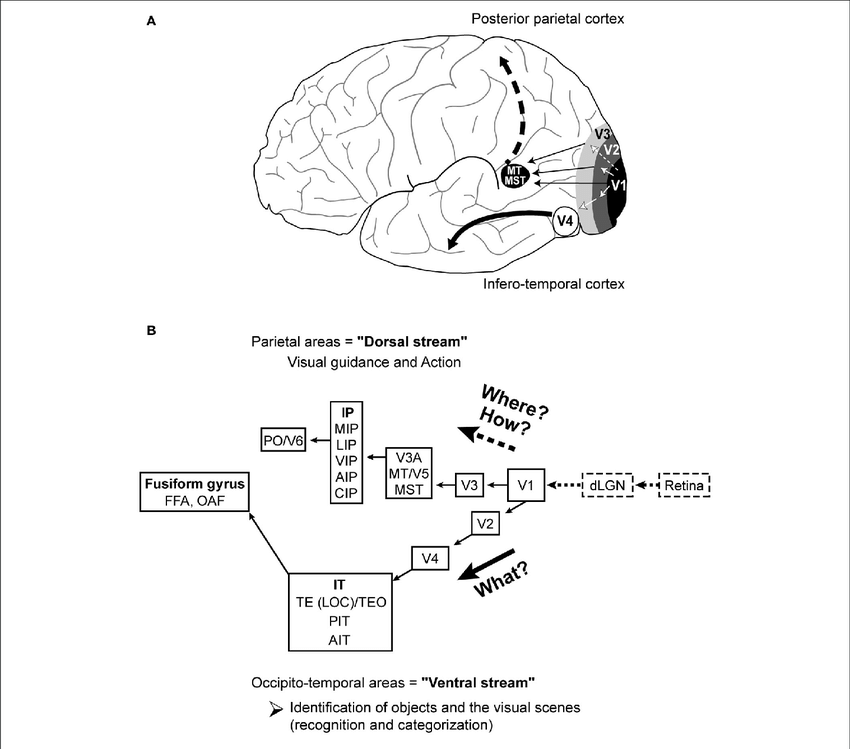

In [36]:
# The voxels labels and the labels used in the experiments
voxels = pd.read_csv("/content/voxels.csv",header=None)
labels = pd.read_csv("/content/ROI_labels.csv")

In [ ]:
voxels.shape

(91282, 1)

In [ ]:
labels.shape

(1, 181)

In [ ]:
labels.head()

labels1 labels2 labels3 labels4 labels5 labels6 labels7 labels8  labels9  \
0  Unknown      V1     MST      V6      V2      V3      V4      V8        4   

  labels10  ... labels172 labels173 labels174 labels175 labels176 labels177  \
0       3b  ...      p47r       TGv     MBelt     LBelt        A4     STSva   

  labels178 labels179 labels180 labels181  
0      TE1m        PI     a32pr       p24  

[1 rows x 181 columns]

In [37]:
voxels = pd.DataFrame(voxels)

In [ ]:
voxels

0
0      34
1      52
2      12
3      26
4      13
...    ..
91277   0
91278   0
91279   0
91280   0
91281   0

[91282 rows x 1 columns]

In [38]:
voxels.columns = ['label_num']

In [39]:
voxels

label_num
0             34
1             52
2             12
3             26
4             13
...          ...
91277          0
91278          0
91279          0
91280          0
91281          0

[91282 rows x 1 columns]

In [40]:
voxels['label_num'].value_counts().nunique

<bound method IndexOpsMixin.nunique of 0      31870
1       1610
8       1562
4       1216
52      1115
       ...  
20       111
66       106
21       103
152      100
156       89
Name: label_num, Length: 181, dtype: int64>

In [41]:
labels_dict = labels.to_dict()

In [42]:
print(labels_dict)

{'labels1': {0: 'Unknown'}, 'labels2': {0: 'V1'}, 'labels3': {0: 'MST'}, 'labels4': {0: 'V6'}, 'labels5': {0: 'V2'}, 'labels6': {0: 'V3'}, 'labels7': {0: 'V4'}, 'labels8': {0: 'V8'}, 'labels9': {0: 4}, 'labels10': {0: '3b'}, 'labels11': {0: 'FEF'}, 'labels12': {0: 'PEF'}, 'labels13': {0: '55b'}, 'labels14': {0: 'V3A'}, 'labels15': {0: 'RSC'}, 'labels16': {0: 'POS2'}, 'labels17': {0: 'V7'}, 'labels18': {0: 'IPS1'}, 'labels19': {0: 'FFC'}, 'labels20': {0: 'V3B'}, 'labels21': {0: 'LO1'}, 'labels22': {0: 'LO2'}, 'labels23': {0: 'PIT'}, 'labels24': {0: 'MT'}, 'labels25': {0: 'A1'}, 'labels26': {0: 'PSL'}, 'labels27': {0: 'SFL'}, 'labels28': {0: 'PCV'}, 'labels29': {0: 'STV'}, 'labels30': {0: '7Pm'}, 'labels31': {0: '7m'}, 'labels32': {0: 'POS1'}, 'labels33': {0: '23d'}, 'labels34': {0: 'v23ab'}, 'labels35': {0: 'd23ab'}, 'labels36': {0: '31pv'}, 'labels37': {0: '5m'}, 'labels38': {0: '5mv'}, 'labels39': {0: '23c'}, 'labels40': {0: '5L'}, 'labels41': {0: '24dd'}, 'labels42': {0: '24dv'}, 'la

In [43]:
labels_dict['labels1'][0]

'Unknown'

In [44]:
labels_dict_keys=['labels1', 'labels2', 'labels3', 'labels4', 'labels5', 'labels6', 'labels7', 'labels8', 'labels9', 'labels10', 'labels11', 'labels12', 'labels13', 'labels14', 'labels15', 'labels16', 'labels17', 'labels18', 'labels19', 'labels20', 'labels21', 'labels22', 'labels23', 'labels24', 'labels25', 'labels26', 'labels27', 'labels28', 'labels29', 'labels30', 'labels31', 'labels32', 'labels33', 'labels34', 'labels35', 'labels36', 'labels37', 'labels38', 'labels39', 'labels40', 'labels41', 'labels42', 'labels43', 'labels44', 'labels45', 'labels46', 'labels47', 'labels48', 'labels49', 'labels50', 'labels51', 'labels52', 'labels53', 'labels54', 'labels55', 'labels56', 'labels57', 'labels58', 'labels59', 'labels60', 'labels61', 'labels62', 'labels63', 'labels64', 'labels65', 'labels66', 'labels67', 'labels68', 'labels69', 'labels70', 'labels71', 'labels72', 'labels73', 'labels74', 'labels75', 'labels76', 'labels77', 'labels78', 'labels79', 'labels80', 'labels81', 'labels82', 'labels83', 'labels84', 'labels85', 'labels86', 'labels87', 'labels88', 'labels89', 'labels90', 'labels91', 'labels92', 'labels93', 'labels94', 'labels95', 'labels96', 'labels97', 'labels98', 'labels99', 'labels100', 'labels101', 'labels102', 'labels103', 'labels104', 'labels105', 'labels106', 'labels107', 'labels108', 'labels109', 'labels110', 'labels111', 'labels112', 'labels113', 'labels114', 'labels115', 'labels116', 'labels117', 'labels118', 'labels119', 'labels120', 'labels121', 'labels122', 'labels123', 'labels124', 'labels125', 'labels126', 'labels127', 'labels128', 'labels129', 'labels130', 'labels131', 'labels132', 'labels133', 'labels134', 'labels135', 'labels136', 'labels137', 'labels138', 'labels139', 'labels140', 'labels141', 'labels142', 'labels143', 'labels144', 'labels145', 'labels146', 'labels147', 'labels148', 'labels149', 'labels150', 'labels151', 'labels152', 'labels153', 'labels154', 'labels155', 'labels156', 'labels157', 'labels158', 'labels159', 'labels160', 'labels161', 'labels162', 'labels163', 'labels164', 'labels165', 'labels166', 'labels167', 'labels168', 'labels169', 'labels170', 'labels171', 'labels172', 'labels173', 'labels174', 'labels175', 'labels176', 'labels177', 'labels178', 'labels179', 'labels180', 'labels181']

In [ ]:
labels_dict_keys[2]

'labels3'

In [ ]:
voxels['label_num'][0]

34

In [45]:
label_char=[]
for i in range(0,voxels.shape[0]):
  k =voxels['label_num'][i]
  k=labels_dict_keys[k]
  label_char.append(labels_dict[k][0])

In [ ]:
label_char

In [47]:
voxels['label_char']=label_char

In [48]:
voxels.head()

label_num label_char
0         34      d23ab
1         52          2
2         12        55b
3         26        SFL
4         13        V3A

In [104]:
voxels['roi']= voxels['label_char'] in roi

ValueError: ignored

In [ ]:
print(voxels[voxels["V1"]==True].index.values)

[   55    56    57 ... 53763 53764 53765]


In [ ]:
voxels["label_char"].unique()

array(['d23ab', 2, '55b', 'SFL', 'V3A', 'PFm', 'a9-46v', 'VMV1', 'TE1p',
       'OP2-3', 'TGd', 'RSC', 'v23ab', 'POS1', 'ProS', 'V1', 'V2', 'VMV2',
       'H', 'PreS', 'PHA1', '23d', '23c', '24dv', 'SCEF', '8BL', '8BM',
       'd32', 'a32pr', 'p24', 'p32pr', 'p24pr', 'a24pr', '33pr', '31pv',
       '31pd', '31a', 'PCV', '5mv', '7Am', '5L', 1, '3b', '3a', 4, '6mp',
       '6ma', '5m', '24dd', 'FEF', '6a', 's6-8', '6d', '7PC', 'AIP',
       'IP2', 'PFt', 'PF', 'PGi', 'TPOJ2', 'TPOJ1', 'PHT', 'PFcm', 'RI',
       'STSvp', 'STSdp', 'A5', 'A4', 'PBelt', 'LBelt', 'A1', 'STV', 'PSL',
       'Ig', 'PoI1', 52, 'PI', 'p47r', 'IFSa', 45, 44, 'FOP4', 'FOP2',
       'a47r', '47l', '47s', 'AVI', 'AAIC', 'Pir', 'PoI2', 'MI', 'FOP3',
       'FOP5', '7AL', 'VIP', 'MIP', 'IPS1', 'V7', '7m', 'POS2', 'DVT',
       'V6', 'V3', '7PL', 'V6A', '7Pm', 'V4', 'V3B', 'IP0', 'PGp', 'PGs',
       'IP1', 'LIPd', 'LIPv', 'LO1', 'LO2', 'V4t', 'MT', 'MST', 'FST',
       'V3CD', 'LO3', 'TPOJ3', '6v', 'OP4', 'OP1', 'PFop

# **The Analysis of the voxels using labels**


*   we have the indexes of the selective voxels and the labels in 'voxels' dataframe
*   Now, we need to select the brain regions 'ROI' that the analysis will be based on



In [49]:
voxels['V1']=voxels["label_char"]=="V1"
voxels['V2']=voxels["label_char"]=="V2"
voxels['V3']=voxels["label_char"]=="V3"
voxels['V4']=voxels["label_char"]=="V4"
voxels['V5']=voxels['label_char']=="V5"
voxels['V6']=voxels['label_char']=="V6"
voxels['V3A']=voxels['label_char']=="V3A"
voxels['MST']=voxels['label_char']=="MST"
voxels['VIP']=voxels['label_char']=="VIP"


In [50]:
# voxels["V1"] = voxels["V1"].astype(int)
voxels.replace({False: 0, True: 1}, inplace=True)

In [51]:
voxels["All_ROIS"]=voxels['V1'] | voxels['V2'] | voxels['V3'] | voxels['V4'] |voxels['V5']|voxels['V6']|voxels['V3A']|voxels['MST']|voxels['VIP']

In [52]:
voxels

label_num label_char  V1  V2  V3  V4  V5  V6  V3A  MST  VIP  All_ROIS
0             34      d23ab   0   0   0   0   0   0    0    0    0         0
1             52          2   0   0   0   0   0   0    0    0    0         0
2             12        55b   0   0   0   0   0   0    0    0    0         0
3             26        SFL   0   0   0   0   0   0    0    0    0         0
4             13        V3A   0   0   0   0   0   0    1    0    0         1
...          ...        ...  ..  ..  ..  ..  ..  ..  ...  ...  ...       ...
91277          0    Unknown   0   0   0   0   0   0    0    0    0         0
91278          0    Unknown   0   0   0   0   0   0    0    0    0         0
91279          0    Unknown   0   0   0   0   0   0    0    0    0         0
91280          0    Unknown   0   0   0   0   0   0    0    0    0         0
91281          0    Unknown   0   0   0   0   0   0    0    0    0         0

[91282 rows x 12 columns]

**As the analysis is at the voxels level, we will take each pair of stimuli and perform the comparison between the ROI**

In [ ]:
dic={"idx_BAR1BAR2":idx_BAR1BAR2 ,"idx_CCWBAR2": idx_CCWBAR2,"idx_CCWBAR1":idx_CCWBAR1 ,"idx_CWBAR2" :idx_CWBAR2, "idx_CWBAR1":idx_CWBAR1 , "idx_CWCCW":idx_CWCCW,"idx_EXPBAR2" :idx_EXPBAR2,"idx_EXPBAR1":idx_EXPBAR1,
     "idx_EXPCCW":idx_EXPCCW,"idx_EXPCW":idx_EXPCW,"idx_CONBAR2":idx_CONBAR2,"idx_CONBAR1":idx_CONBAR1,"idx_CONCCW":idx_CONCCW, "idx_CONCW":idx_CONCW, "idx_CONEXP":idx_CONEXP}
dic_keys=['idx_BAR1BAR2', 'idx_CCWBAR2', 'idx_CCWBAR1', 'idx_CWBAR2', 'idx_CWBAR1', 'idx_CWCCW', 'idx_EXPBAR2', 'idx_EXPBAR1', 'idx_EXPCCW', 'idx_EXPCW', 'idx_CONBAR2', 'idx_CONBAR1', 'idx_CONCCW', 'idx_CONCW', 'idx_CONEXP']

In [53]:
# For this pair: BAR1BAR2
idx_BAR1BAR2=dic['idx_BAR1BAR2']


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223

In [ ]:
voxels.iloc[idx_BAR1BAR2]

In [71]:
dic_keys

['idx_BAR1BAR2',
 'idx_CCWBAR2',
 'idx_CCWBAR1',
 'idx_CWBAR2',
 'idx_CWBAR1',
 'idx_CWCCW',
 'idx_EXPBAR2',
 'idx_EXPBAR1',
 'idx_EXPCCW',
 'idx_EXPCW',
 'idx_CONBAR2',
 'idx_CONBAR1',
 'idx_CONCCW',
 'idx_CONCW',
 'idx_CONEXP']

In [79]:
data_diff=[]
for key in dic_keys:
  idx=dic[key]
  j=dic_keys.index(key)
  name="diff" + str(key)
  data_diff.append(name)
  locals()["diff"+str(key)] = voxels.iloc[idx]

In [103]:
diffidx_CCWBAR2

label_num label_char  V1  V2  V3  V4  V5  V6  V3A  MST  VIP  All_ROIS
4             13        V3A   0   0   0   0   0   0    1    0    0         1
55             1         V1   1   0   0   0   0   0    0    0    0         1
56             1         V1   1   0   0   0   0   0    0    0    0         1
57             1         V1   1   0   0   0   0   0    0    0    0         1
58             1         V1   1   0   0   0   0   0    0    0    0         1
...          ...        ...  ..  ..  ..  ..  ..  ..  ...  ...  ...       ...
91277          0    Unknown   0   0   0   0   0   0    0    0    0         0
91278          0    Unknown   0   0   0   0   0   0    0    0    0         0
91279          0    Unknown   0   0   0   0   0   0    0    0    0         0
91280          0    Unknown   0   0   0   0   0   0    0    0    0         0
91281          0    Unknown   0   0   0   0   0   0    0    0    0         0

[90704 rows x 12 columns]

In [97]:
s=diffidx_CCWBAR2

In [102]:
s['label_char']

4            V3A
55            V1
56            V1
57            V1
58            V1
          ...   
91277    Unknown
91278    Unknown
91279    Unknown
91280    Unknown
91281    Unknown
Name: label_char, Length: 90704, dtype: object

In [91]:
roi=["V1","V2","V3","V4","V5","V6","V3A","MST","VIP"]
#data = data.drop(labels=0, axis=0)
for i in range(0,s.shape[0]):
  if s['label_char'][i] not in ["V1","V2","V3","V4","V5","V6","V3A","MST","VIP"]:
    s.drop(labels=i,axis=0,inplace=True)

KeyError: ignored

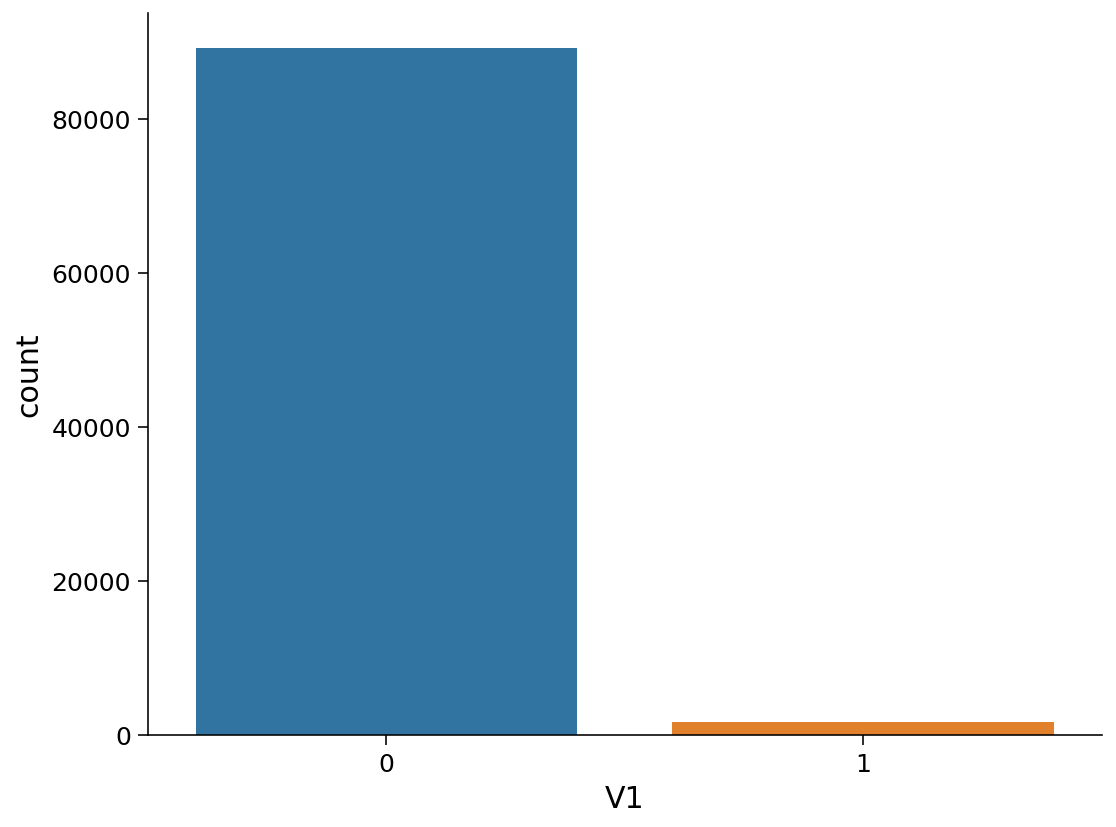

In [86]:
import seaborn as sns
sns.countplot(x='V1', data=diffidx_CCWBAR2)

In [73]:
data_diff

['diffidx_BAR1BAR2',
 'diffidx_CCWBAR2',
 'diffidx_CCWBAR1',
 'diffidx_CWBAR2',
 'diffidx_CWBAR1',
 'diffidx_CWCCW',
 'diffidx_EXPBAR2',
 'diffidx_EXPBAR1',
 'diffidx_EXPCCW',
 'diffidx_EXPCW',
 'diffidx_CONBAR2',
 'diffidx_CONBAR1',
 'diffidx_CONCCW',
 'diffidx_CONCW',
 'diffidx_CONEXP']

In [ ]:
roi=["V1","V2","V3","V4","V5","V6","V3A","MST","VIP"]

In [ ]:
for data in data_diff:
  

From the shape of the data matrix, you should be able to see that there are 300 time points and 91282 brain locations (this is a mixture of cortical surface vertices and subcortical voxels, which the cifti format allows to store together).



# Data Analysis 



1 - average matrix of each stimulus over time => voxels (steps * 1) array

2- compare between each array using T-statistics technique 

# Visualisation


In [ ]:
# @title Helper function
# Helper function
def surf_data_from_cifti(data, cifti, surf_name):
  """Maps data from cifti file onto a surface

  Args:
      data : 2D array (nvertices x p)
      cifti : Cifti2Image object
      surf_name : str (either 'LEFT' or 'RIGHT')
  """
  surf_name_long = 'CIFTI_STRUCTURE_CORTEX_'+surf_name
  axis = cifti.header.get_axis(1)  # The brain axis
  for name, data_indices, model in axis.iter_structures():
    if name == surf_name_long:
      vtx_indices = model.vertex
      surf_data = np.zeros(axis.nvertices[surf_name_long])
      surf_data[vtx_indices] = data[data_indices]
      return surf_data
  raise ValueError(f"No structure named {surf_name_long}")

In [ ]:
# This uses the nilearn package

# Plot the angle
data = angle
data[amplitude < 20] = 0

# If you want you can change the surface. Have a look in hcp_retino/surf for more options
filename = "Q1-Q6_R440.L.inflated.32k_fs_LR.surf.gii"
pathf = os.path.join(DATA_DIR, fname_ex, "surf", filename)
plotting.view_surf(surf_mesh=pathf,
                   surf_map=surf_data_from_cifti(data,cifti,'LEFT'),
                   cmap='hsv', threshold=.0001)

That's it for now. Note that the stimulus files are stored as Numpy arrays in `hcp_retino/stims`. They can be used to do [Population Receptive Field modelling](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3073038/). 

In [ ]:
filename1 = os.path.join(DATA_DIR1, f'Q1-Q6_R440.MyelinMap_BC.32k_fs_LR.dscalar.nii')
mmp = nib.load(filename1)

print(mmp.get_fdata().shape)

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(1, 59412)


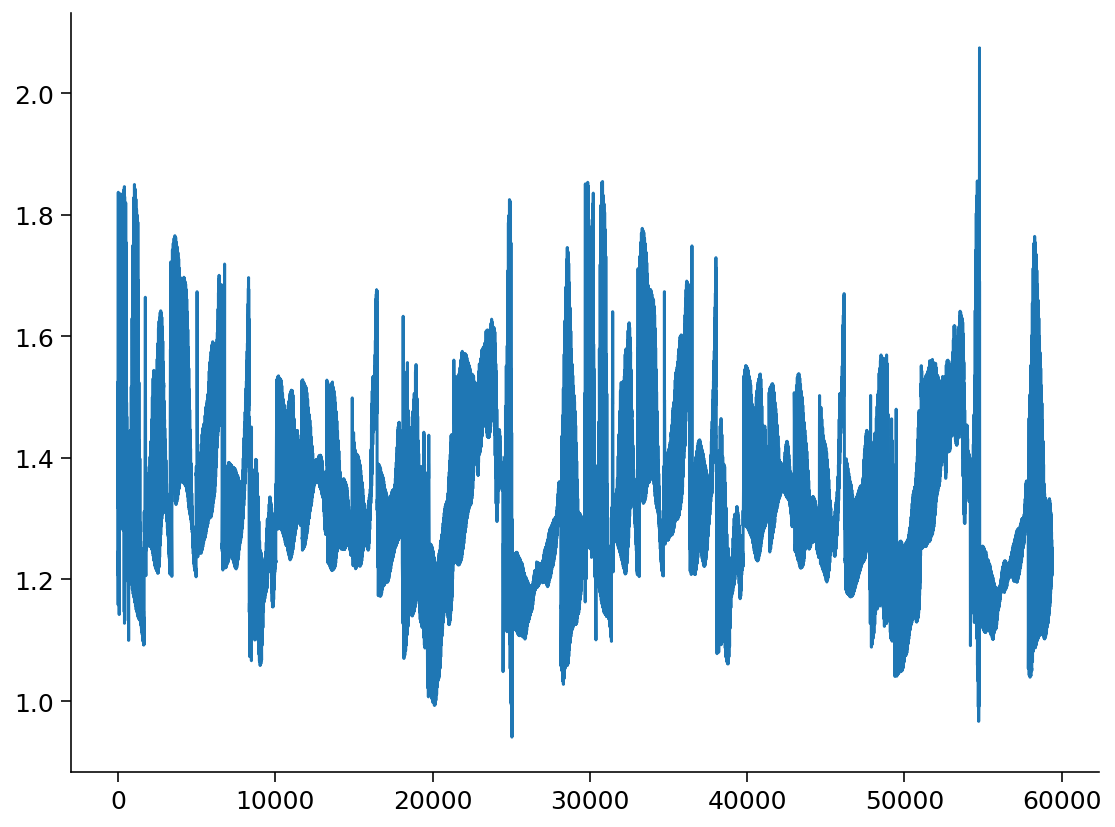

In [ ]:
# type(mmp.get_fdata())
# print(mmp.get_fdata())
m_map = mmp.get_fdata().tolist()

plt.plot(m_map[0])

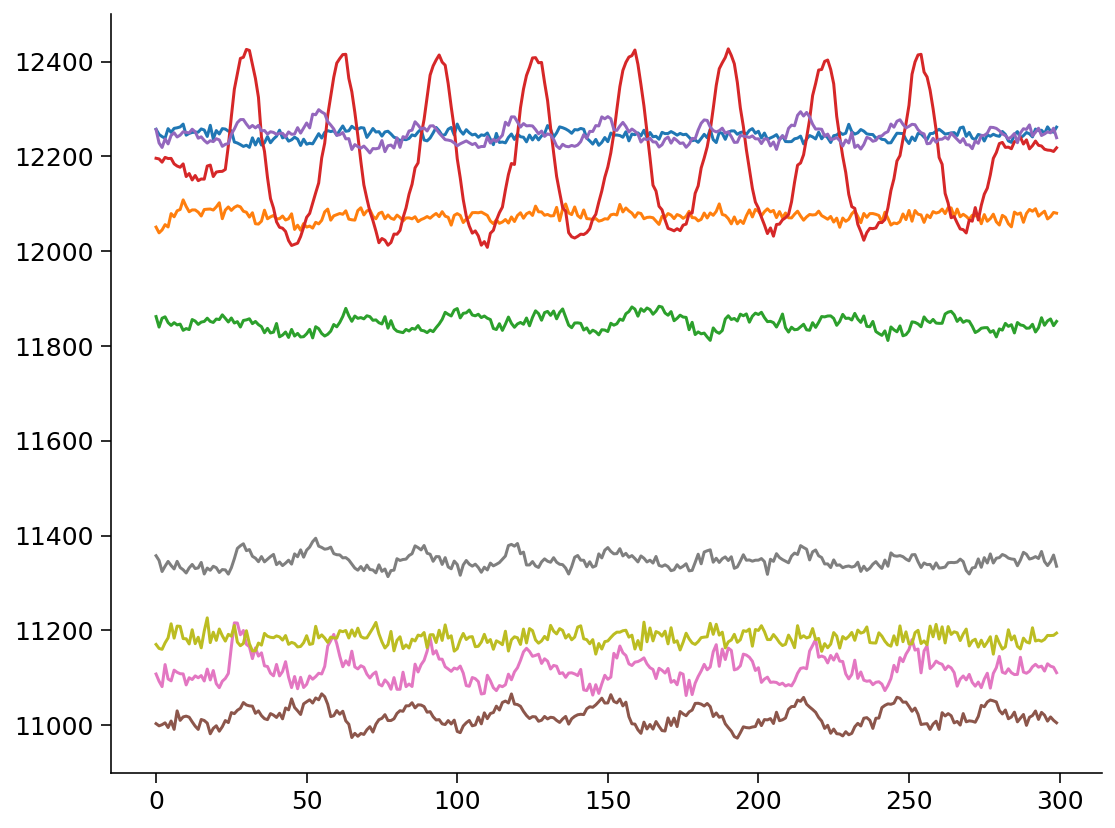

In [ ]:
mp = cifti.get_fdata()
plt.plot(mp[:,1:10])